In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('trainn.csv')

In [3]:
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
print('Total Number of images:',df.shape[0])

Total Number of images: 42000


In [6]:
df['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

<AxesSubplot:xlabel='label', ylabel='count'>

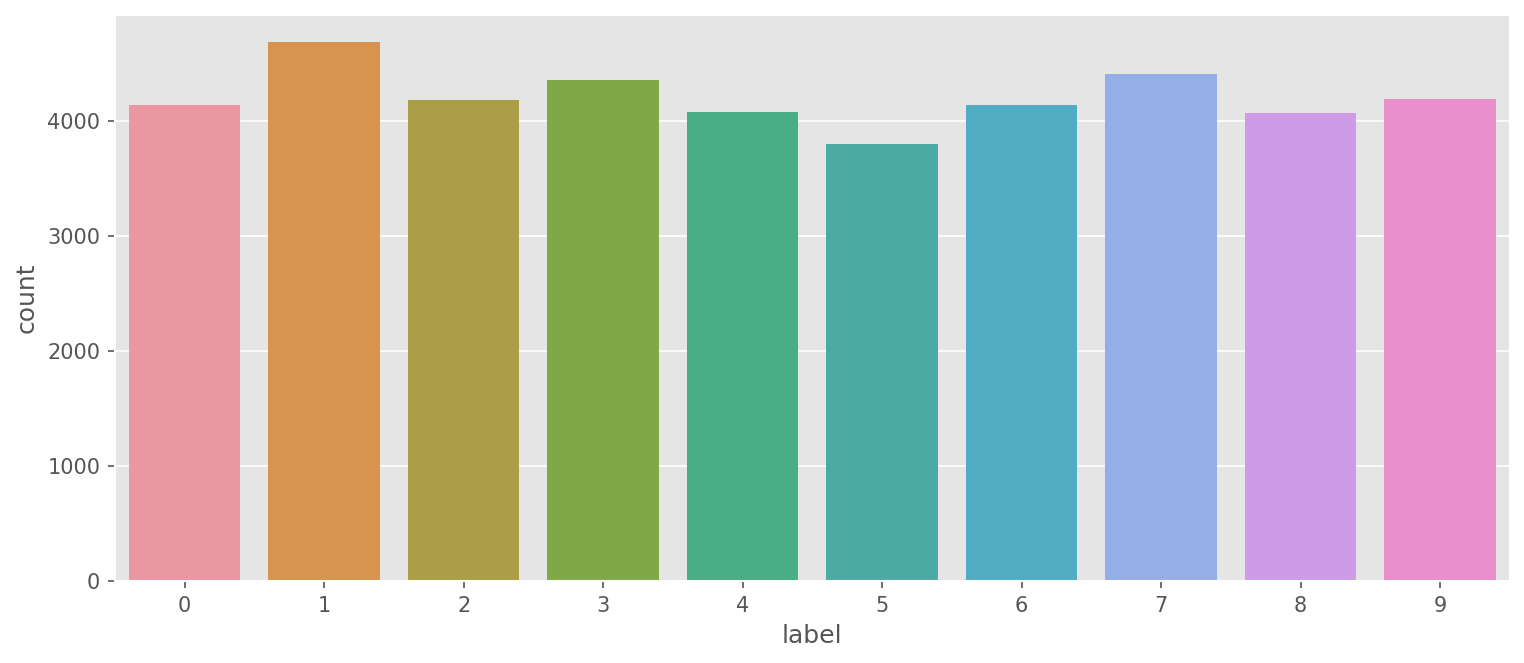

In [7]:
plt.figure(figsize=(12,5),dpi=150)
sns.countplot(df['label'])

In [8]:
X = df.drop('label',axis=1).values
Y = df[['label']].values

In [9]:
print('Data shape :',X.shape)
print('Label shape :',Y.shape)

Data shape : (42000, 784)
Label shape : (42000, 1)


In [10]:
X[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  18,  30, 137, 137, 192,  86,  72,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  13,  86, 250, 254, 254, 254, 254, 217,
       246, 151,  32,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  16, 179, 254, 254, 254, 25

(-0.5, 27.5, 27.5, -0.5)

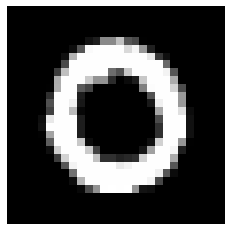

In [11]:
plt.imshow(X[1].reshape(28,28),cmap = 'gray')
plt.axis('off')

In [12]:
np.set_printoptions(linewidth = 300)
print(X[1].reshape(28,28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18  30 137 137 192  86  72   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  13  86 250 254 254 254 254 217 246 151  32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  16 179 254 254 254 254 254 254 254 254 254 231  54  15   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  72 254 254 254 254 254 254 254 254 254 254 254 254 104   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  61 191 254 254 254 254 254 109  83 199 254 254 254 25

(-0.5, 27.5, 27.5, -0.5)

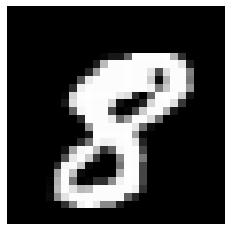

In [13]:
plt.imshow(X[10].reshape(28,28),cmap = 'gray')
plt.axis('off')

In [14]:
np.set_printoptions(linewidth = 300)
print(X[10].reshape(28,28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   7  24  24  97 253 253 253 253 255 180  48   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  30 186 252 252 253 252 252 252 252 253 252 227  29   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  38 155 252 252 252 253 252 252 227  7

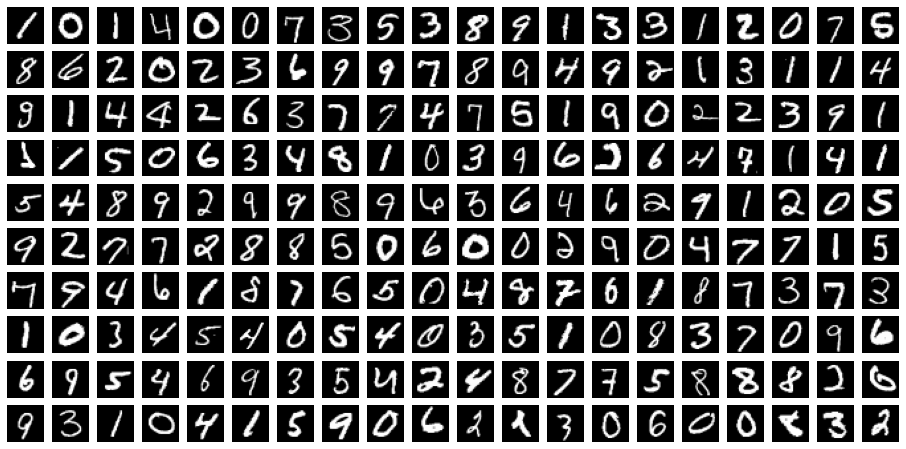

In [15]:
plt.figure(figsize = (16,8))
for i in range(200):
    plt.subplot(10,20, i+1)
    plt.imshow(X[i].reshape(28,28), cmap = 'gray')
    plt.axis('off')

In [16]:
X = X/255

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)

In [18]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (29400, 784)
Training Labels Shape :  (29400, 1)
Testing Data Shape    :  (12600, 784)
Testing Labels Shape  :  (12600, 1)


In [19]:
! pip install xgboost

In [20]:
! pip install lightgbm

#  - XGBoost : eXtreme Gradient Boost

In [23]:
from xgboost import XGBClassifier
xg_classifier = XGBClassifier(n_estimators = 50, max_depth = 5, learning_rate = 0.1)
xg_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [24]:
pred_train = xg_classifier.predict(x_train)
pred_test  = xg_classifier.predict(x_test)

print('Training Accuracy :', accuracy_score(y_train, pred_train))
print('Testing Accuracy :', accuracy_score(y_test, pred_test))

Training Accuracy : 0.9737755102040816
Testing Accuracy : 0.9438888888888889


# - Light GBM : Light Gradient Boosting Machine

In [27]:
from lightgbm import LGBMClassifier
lg_classifier = LGBMClassifier(n_estimators = 50)
lg_classifier.fit(x_train,y_train)

LGBMClassifier(n_estimators=50)

In [28]:
pred_train = lg_classifier.predict(x_train)
pred_test  = lg_classifier.predict(x_test)

print('Training Accuracy :', accuracy_score(y_train, pred_train))
print('Testing Accuracy :', accuracy_score(y_test, pred_test))

Training Accuracy : 0.9999659863945578
Testing Accuracy : 0.964047619047619


# - Ada Boost : Adaptive Boosting

In [31]:
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(max_depth = 8)

from sklearn.ensemble import AdaBoostClassifier
ad_classifier = AdaBoostClassifier(estimator, n_estimators = 50)
ad_classifier.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8))

In [32]:
pred_train = ad_classifier.predict(x_train)
pred_test  = ad_classifier.predict(x_test)

print('Training Accuracy :', accuracy_score(y_train, pred_train))
print('Testing Accuracy :', accuracy_score(y_test, pred_test))

Training Accuracy : 0.9831292517006802
Testing Accuracy : 0.911984126984127


# - Stacking Ensemble

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [36]:
dt_classifier  = DecisionTreeClassifier(max_depth = 10)
knn_classifier = KNeighborsClassifier(n_neighbors = 7)
lg_classifier  = LGBMClassifier(n_estimators = 50)
xg_classifier  = XGBClassifier(n_estimators = 50)
rf_classifier  = RandomForestClassifier(n_estimators = 100, max_depth = 10)

In [41]:
from sklearn.ensemble import VotingClassifier
vt_classifier = VotingClassifier(estimators = [('dt', dt_classifier),('knn', knn_classifier),('lg', lg_classifier),
                                               ('xg', xg_classifier),('rf', rf_classifier)], voting = 'hard')
vt_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=10)),
                             ('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('lg', LGBMClassifier(n_estimators=50)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_th

In [42]:
pred_train = vt_classifier.predict(x_train)
pred_test  = vt_classifier.predict(x_test)

print('Training Accuracy :', accuracy_score(y_train, pred_train))
print('Testing Accuracy :', accuracy_score(y_test, pred_test))

Training Accuracy : 0.9943877551020408
Testing Accuracy : 0.966031746031746
